In [ ]:
import os
caches_dir = ["D:/snapfoliav2/.cache/", "E:/.cache/]

# Will set the cache in the first caches dir found in the storage
for cache in caches_dir:
    if os.path.exists(cache):
        os.environ['HF_HOME'] = cache
        print(f"Cache path set on {cache}")
        break
    else:
        print(f"Path does not  exist {cache}")

In [7]:
import os 
IMG_NAME = "dog.jpg"

In [8]:
import torch
from transformers import DetrForObjectDetection, DetrImageProcessor

In [ ]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
CHECKPOINT = "MODELS/facebook/detr-resnet-50"
CONFIDENCE_TRESHOLD = 0.5
IOU_TRESHOLD = 0.8


image_processor = DetrImageProcessor.from_pretrained(CHECKPOINT)
model = DetrForObjectDetection.from_pretrained(CHECKPOINT)
model.to(DEVICE)

### Inference

In [10]:
import cv2
import torch
import supervision as sv

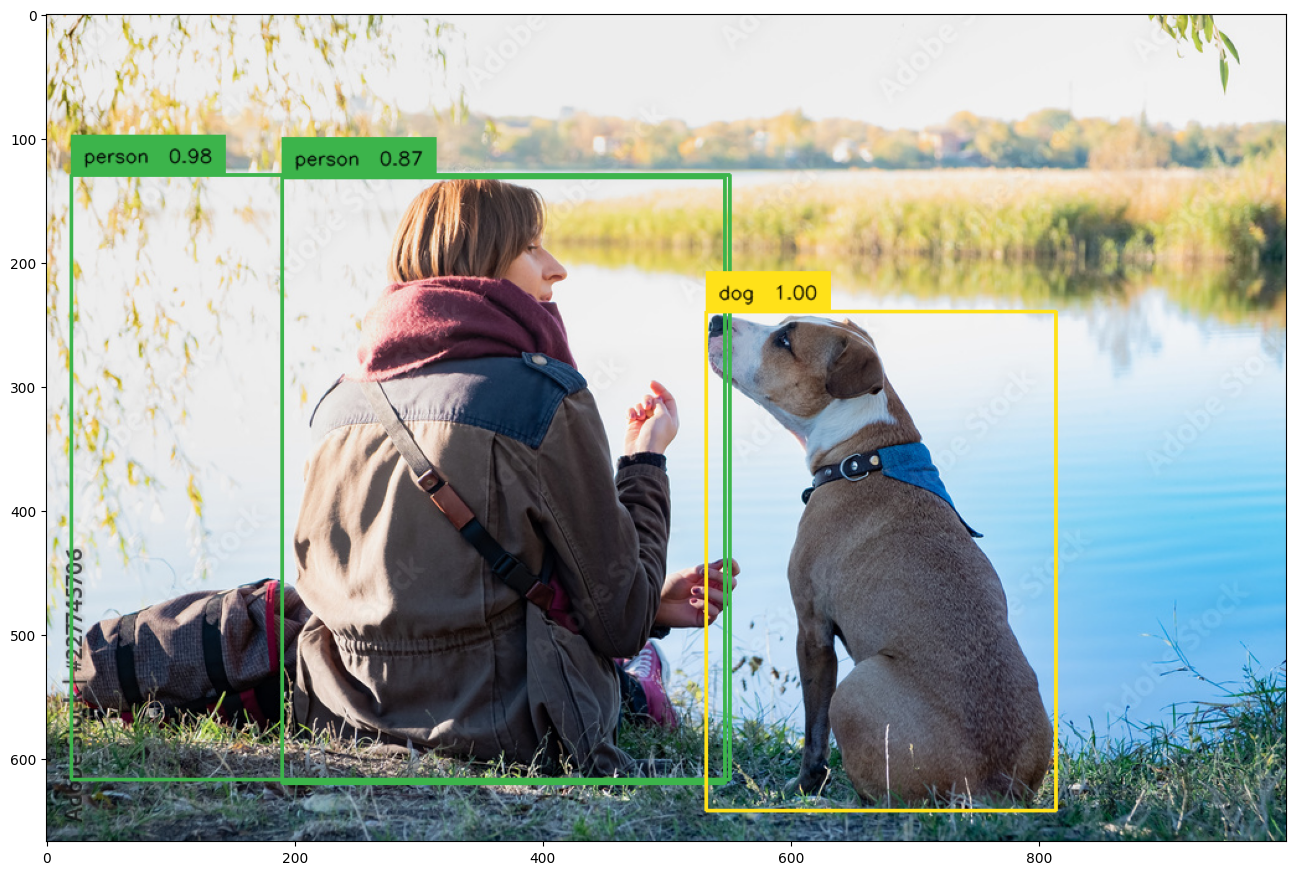

In [11]:
with torch.no_grad():

    #load image and predict
    image = cv2.imread(IMG_NAME)
    inputs = image_processor(images=image, return_tensors='pt').to(DEVICE)
    outputs = model(**inputs)

    #post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(DEVICE)
    results = image_processor.post_process_object_detection(
        outputs=outputs,
        threshold=CONFIDENCE_TRESHOLD,
        target_sizes=target_sizes
    )[0]

# annotate
detections = sv.Detections.from_transformers(transformers_results=results)

labels = [
    f"{model.config.id2label[class_id]} {confidence: 0.2f}"
    for _, confidence, class_id, _ in detections
]

box_annotator = sv.BoxAnnotator()
frame = box_annotator.annotate(scene=image, detections=detections,labels=labels)

%matplotlib inline
sv.show_frame_in_notebook(frame, (16,16))